In [1]:
from matminer.datasets import load_dataset
from matminer.featurizers.composition import ElementProperty
from pymatgen.core import Composition
from matminer.featurizers.conversions import StrToComposition
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

df = load_dataset("expt_gap")

print(df.head())
print(df.columns)
print(len(df))

/home/ssabogal/Documents/Course ML4SCI/Project/Entornoproyecto/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        formula  gap expt
0  Hg0.7Cd0.3Te      0.35
1          CuBr      3.08
2           LuP      1.30
3      Cu3SbSe4      0.40
4           ZnO      3.44
Index(['formula', 'gap expt'], dtype='object')
6354


In [2]:
from pymatgen.core import Composition
from matminer.featurizers.structure import (
    SiteStatsFingerprint,
    BondFractions,
    RadialDistributionFunction,
    StructuralComplexity,
    StructuralHeterogeneity,
    GlobalSymmetryFeatures
)
from matminer.featurizers.site import CrystalNNFingerprint




In [3]:
from matminer.featurizers.conversions import StrToComposition
df = StrToComposition().featurize_dataframe(df, "formula")

ep_feat = ElementProperty.from_preset("magpie")
df = ep_feat.featurize_dataframe(df, "composition", ignore_errors=True)


StrToComposition: 100%|██████████| 6354/6354 [00:01<00:00, 4858.93it/s]
/home/ssabogal/Documents/Course ML4SCI/Project/Entornoproyecto/lib/python3.13/site-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)
ElementProperty: 100%|██████████| 6354/6354 [00:05<00:00, 1144.38it/s]


In [4]:
featurizers = [
    BondFractions(), 
    RadialDistributionFunction(),
    StructuralComplexity(),
    GlobalSymmetryFeatures(),
    StructuralHeterogeneity(),
    SiteStatsFingerprint(CrystalNNFingerprint.from_preset("ops") ,stats=("mean", "std"))
]

In [5]:
df

,formula,gap expt,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)",48.0,80.0,32.0,61.200000,13.160000,52.0,70.0,...,0.000000,0.000000,0.000000,0.000000,152.0,194.0,42.0,163.200000,11.200000,152.0
1,CuBr,3.08,"(Cu, Br)",29.0,35.0,6.0,32.000000,3.000000,29.0,64.0,...,0.000000,0.000000,0.000000,0.000000,64.0,225.0,161.0,144.500000,80.500000,64.0
2,LuP,1.30,"(Lu, P)",15.0,71.0,56.0,43.000000,28.000000,15.0,41.0,...,0.002247,0.001124,0.001124,0.000000,2.0,194.0,192.0,98.000000,96.000000,2.0
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)",29.0,51.0,22.0,34.250000,4.187500,34.0,64.0,...,0.000000,0.000000,0.000000,0.000000,14.0,225.0,211.0,112.125000,98.125000,14.0
4,ZnO,3.44,"(Zn, O)",8.0,30.0,22.0,19.000000,11.000000,8.0,69.0,...,0.000000,0.000000,0.000000,0.000000,12.0,194.0,182.0,103.000000,91.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6349,Tm2MgTl,0.00,"(Tm, Mg, Tl)",12.0,81.0,69.0,57.750000,22.875000,69.0,37.0,...,0.000000,0.000000,0.000000,0.000000,194.0,194.0,0.0,194.000000,0.000000,194.0
6350,Nb5Ga4,0.00,"(Nb, Ga)",31.0,41.0,10.0,36.555556,4.938272,41.0,47.0,...,0.000000,0.000000,0.000000,0.000000,64.0,229.0,165.0,155.666667,81.481481,229.0
6351,Tb2Sb5,0.00,"(Tb, Sb)",51.0,65.0,14.0,55.000000,5.714286,51.0,29.0,...,0.000000,0.000000,0.000000,0.000000,166.0,194.0,28.0,174.000000,11.428571,166.0
6352,Lu2AlTc,0.00,"(Lu, Al, Tc)",13.0,71.0,58.0,49.500000,21.500000,71.0,41.0,...,0.002247,0.001124,0.001124,0.002247,194.0,225.0,31.0,201.750000,11.625000,194.0


In [6]:
df.columns

Index(['formula', 'gap expt', 'composition', 'MagpieData minimum Number',
       'MagpieData maximum Number', 'MagpieData range Number',
       'MagpieData mean Number', 'MagpieData avg_dev Number',
       'MagpieData mode Number', 'MagpieData minimum MendeleevNumber',
       ...
       'MagpieData range GSmagmom', 'MagpieData mean GSmagmom',
       'MagpieData avg_dev GSmagmom', 'MagpieData mode GSmagmom',
       'MagpieData minimum SpaceGroupNumber',
       'MagpieData maximum SpaceGroupNumber',
       'MagpieData range SpaceGroupNumber', 'MagpieData mean SpaceGroupNumber',
       'MagpieData avg_dev SpaceGroupNumber',
       'MagpieData mode SpaceGroupNumber'],
      dtype='object', length=135)

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

y = df["gap expt"].drop(1569)
#X  =df[df.columns[3:]].drop(1569)

X = df[["MagpieData mean Electronegativity",
        "MagpieData range Electronegativity", 
        "MagpieData mean Row",
        "MagpieData mean NdValence",
        "MagpieData avg_dev Column",
        "MagpieData mean NUnfilled",
        "MagpieData mean MeltingT",
        "MagpieData minimum GSvolume_pa",
        "MagpieData mode Column",
        "MagpieData avg_dev Electronegativity",
        "MagpieData mode NValence",
        "MagpieData mean NpValence",
        ]].drop(1569)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = RandomForestRegressor(
    n_estimators=148,
    max_depth=28,
    random_state=42
)

model.fit(X_train, y_train)

,n_estimators,148
,criterion,'squared_error'
,max_depth,28
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE:{mae:.3f}")
print(rf"$R^2$ = {r2:.3f}")

MAE:0.377
$R^2$ = 0.793


Series([], dtype: float64)


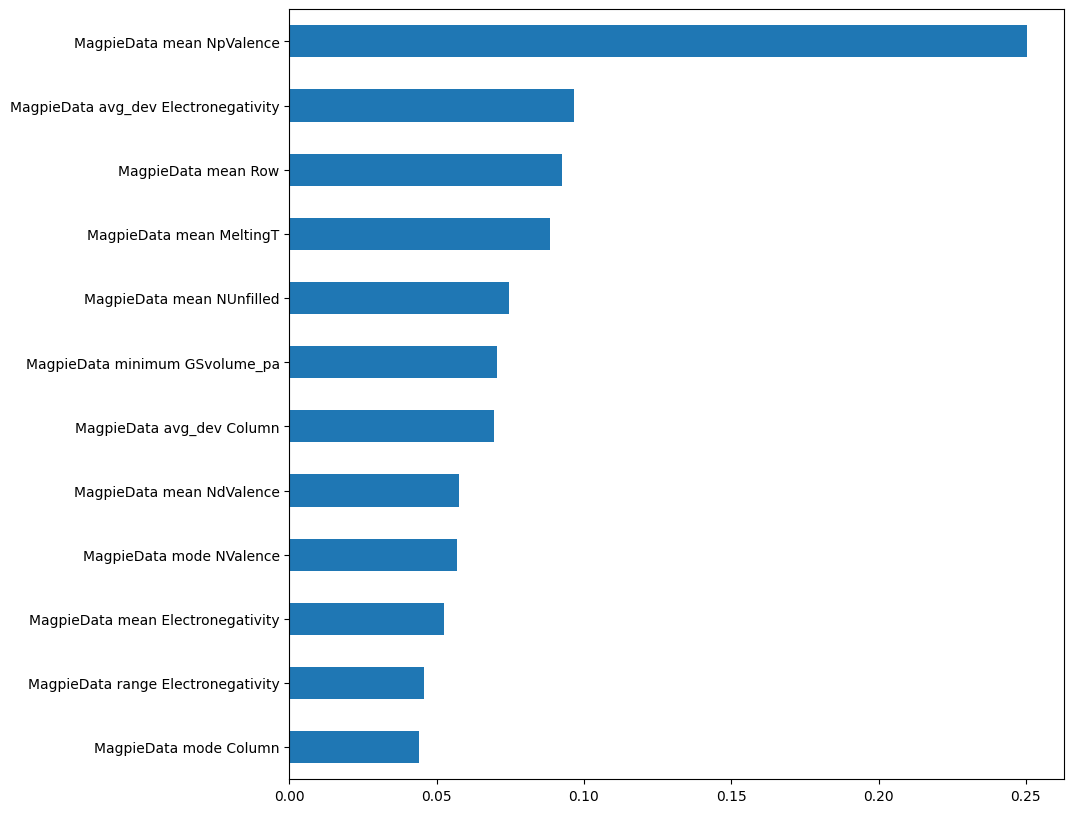

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10,10))
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
print(importances.sort_values()[120:])


In [12]:
len(importances.sort_values())

12

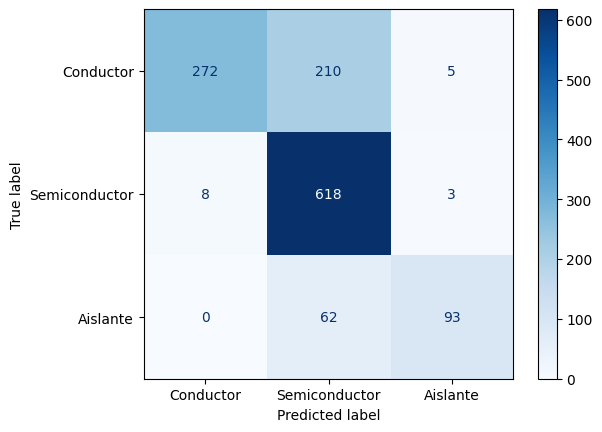

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def gap(gap):
    if gap < 0.1:
        return "Conductor"
    elif gap < 3:
        return "Semiconductor"
    else:
        return "Aislante"
    
y_test_cat = [gap(val) for val in y_test]
y_pred_cat = [gap(val) for val in y_pred]

cm  = confusion_matrix(y_test_cat, y_pred_cat, labels = ["Conductor","Semiconductor","Aislante"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Conductor", "Semiconductor", "Aislante"])
disp.plot(cmap="Blues")

In [14]:
import optuna
from sklearn.model_selection import cross_val_score




def objective(trial):
    # 1. Sugerir hiperparámetros (definir el espacio de búsqueda dinámico)
    # Optuna decide qué valor probar en cada 'trial'
    max_depth = trial.suggest_int('max_depth', 2, 32)
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    criterion = trial.suggest_categorical('criterion', ['absolute_error', 'squared_error'])

    # 2. Inicializar el modelo con los hiperparámetros sugeridos
    model = RandomForestRegressor(
        max_depth=max_depth,
        n_estimators=n_estimators,
        criterion=criterion,
        random_state=42
    )

    # 3. Entrenar y evaluar el modelo (usando validación cruzada)
    score = cross_val_score(model, X, y, cv=5).mean()

    # 4. Devolver la métrica objetivo a maximizar/minimizar
    # En este caso, queremos maximizar la precisión media (accuracy)
    return score


In [15]:
study = optuna.create_study(direction='maximize')

# Paso 2: Ejecutar la optimización
# El número de pruebas (trials) es el número de combinaciones de hiperparámetros que Optuna probará
print("Iniciando optimización...")
study.optimize(objective, n_trials=100) # Probamos 100 combinaciones diferentes

# Paso 3: Analizar los resultados
print("\n--- Resultados de la Optimización ---")
print(f"Número total de pruebas completadas: {len(study.trials)}")
print(f"Mejor valor (score) encontrado: {study.best_value:.4f}")
print("Mejores hiperparámetros:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")


# Paso 4: Usar el mejor modelo encontrado
# Ahora que sabes cuáles son los mejores parámetros, puedes construir tu modelo final
best_params = study.best_params

final_model = RandomForestRegressor(
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    criterion=best_params['criterion'],
    random_state=42
)

# Entrenar el modelo final con TODO el conjunto de datos
final_model.fit(X, y)

print("\nModelo final entrenado con los mejores hiperparámetros.")

[I 2025-11-13 20:27:37,773] A new study created in memory with name: no-name-6ff87991-c67b-4f05-a868-c27dd72602b2


Iniciando optimización...


[I 2025-11-13 20:27:47,229] Trial 0 finished with value: -0.10212030175293818 and parameters: {'max_depth': 10, 'n_estimators': 123, 'criterion': 'squared_error'}. Best is trial 0 with value: -0.10212030175293818.
[I 2025-11-13 20:32:13,484] Trial 1 finished with value: -0.689533491386997 and parameters: {'max_depth': 6, 'n_estimators': 176, 'criterion': 'absolute_error'}. Best is trial 0 with value: -0.10212030175293818.
[I 2025-11-13 20:35:04,258] Trial 2 finished with value: -1.1366122569227326 and parameters: {'max_depth': 2, 'n_estimators': 198, 'criterion': 'absolute_error'}. Best is trial 0 with value: -0.10212030175293818.
[I 2025-11-13 20:35:05,676] Trial 3 finished with value: -0.6904732828947762 and parameters: {'max_depth': 3, 'n_estimators': 52, 'criterion': 'squared_error'}. Best is trial 0 with value: -0.10212030175293818.
[I 2025-11-13 20:35:08,866] Trial 4 finished with value: -0.6793767994605603 and parameters: {'max_depth': 3, 'n_estimators': 118, 'criterion': 'squar


--- Resultados de la Optimización ---
Número total de pruebas completadas: 100
Mejor valor (score) encontrado: 0.0803
Mejores hiperparámetros:
  max_depth: 28
  n_estimators: 148
  criterion: squared_error

Modelo final entrenado con los mejores hiperparámetros.
